In [32]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [37]:
  ROOT='./kaggle/input/dt23-test/'
  adjusted_close_df = pd.read_csv(ROOT+'series/adjusted_close.csv',index_col=0)
  adjusted_close_df.index = pd.to_datetime(adjusted_close_df.index)

  close_df = pd.read_csv(ROOT+'series/close.csv', index_col = 0)
  close_df.index = pd.to_datetime(close_df.index)
  # Uncomment the following line to test the notebook on a reduced number of 
  # products that span the entire makespan
  # adjusted_close_df = adjusted_close_df.dropna(axis=1).iloc[:,:20]

  print(adjusted_close_df.head())


            adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR  \
timestamp                                                                  
2023-10-06            53.450000               295.68               28.19   
2023-10-05            53.070000               290.09               27.58   
2023-10-04            53.450000               290.28               27.84   
2023-10-03            53.650000               288.04               27.95   
2023-10-02            53.997474               294.98               28.58   

            adjusted_close_DVN  adjusted_close_MRO  adjusted_close_BA  \
timestamp                                                               
2023-10-06               43.70               24.59             187.38   
2023-10-05               42.85               24.24             186.29   
2023-10-04               43.35               24.40             186.73   
2023-10-03               45.75               25.68             188.92   
2023-10-02               45.6

In [34]:

def polynomial_regression(past_prices):
    """
        Fits a 3d degree polynomial for each asset and returns the predicted value
    """
    past_prices.index = pd.to_datetime(past_prices.index)

    models={}

    # Fitting a 3d degree polynomial for each asset
    for c in past_prices.columns:
        x=past_prices[[c]]
        xp = PolynomialFeatures(degree=3).fit_transform(np.arange(len(x)).reshape((len(x),1)))
        model = sm.OLS(x.values, xp).fit()
        models[c] = model

    # Returning the next value of each polynomial
    return pd.DataFrame({k:v.predict(PolynomialFeatures(degree=3).fit_transform(np.array([len(x)]).reshape((1,1)))) for k,v in models.items()})/past_prices.iloc[-1]

    poly_df = polynomial_regression(adjusted_close_df)

    print(poly_df.head())
  

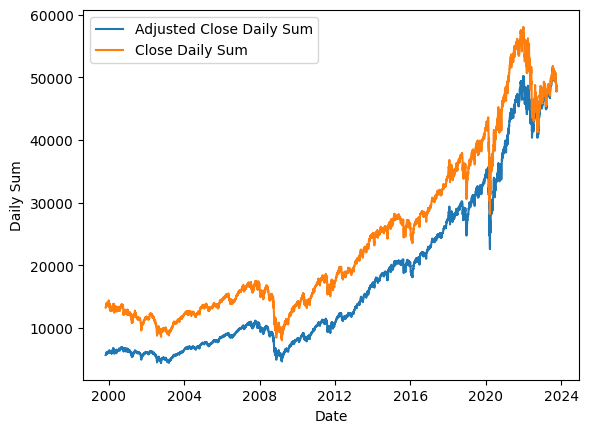

In [35]:
adjusted_close_df['daily_sum'] = adjusted_close_df.sum(axis=1)
close_df['daily_sum'] = close_df.sum(axis=1)

adjusted_close_df.head()


# Assuming you have already calculated 'daily_sum' for both dataframes
# adjusted_close_df and close_df

# Plotting the 'daily_sum' from adjusted_close_df
plt.plot(adjusted_close_df['daily_sum'], label='Adjusted Close Daily Sum')

# Plotting the 'daily_sum' from close_df
plt.plot(close_df['daily_sum'], label='Close Daily Sum')

# Adding labels and a legend
plt.xlabel('Date')
plt.ylabel('Daily Sum')
plt.legend()

# Display the plot
plt.show()


KeyError: 'daily_sum'

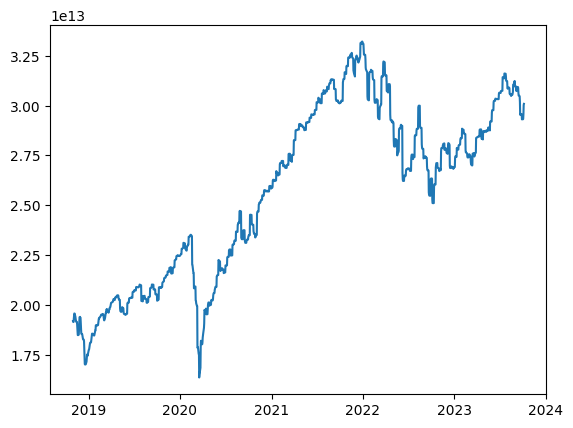

In [40]:

# Read the market_cap.csv file and set the 'date' column as the index
market_cap_df = pd.read_csv(ROOT + 'series/additional_data/market_cap.csv')
market_cap_df['date'] = pd.to_datetime(market_cap_df['date'])  # Convert 'date' to datetime
market_cap_df.set_index('date', inplace=True)

# Calculate the 'daily_sum' column
market_cap_df['daily_sum'] = market_cap_df.sum(axis=1)

# Sort the DataFrame by 'date' in ascending order
market_cap_df.sort_index(inplace=True)


# Align the two DataFrames to only include the common dates
common_market_cap, common_adjusted_close = market_cap_df.align(adjusted_close_df, join='inner', axis=0)

# Plotting the 'daily_sum' for common dates
plt.plot(common_market_cap.index, common_market_cap['daily_sum'], label='Market Cap Daily Sum')
plt.plot(common_adjusted_close.index, common_adjusted_close['daily_sum'], label='Adjusted Close Daily Sum')

# Adding labels and a legend
plt.xlabel('Date')
plt.ylabel('Daily Sum')
plt.legend()

# Display the plot
plt.show()
